Importing libaries and data set.

In [873]:
import pandas as pd
import numpy as np
import seaborn as sns

In [874]:
file = "data_100000.csv"
df = pd.read_csv(file)
df.head(50)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     100000 non-null  object 
 1   crash_time                     100000 non-null  object 
 2   borough                        64974 non-null   object 
 3   zip_code                       64966 non-null   float64
 4   latitude                       91965 non-null   float64
 5   longitude                      91965 non-null   float64
 6   location                       91965 non-null   object 
 7   on_street_name                 73991 non-null   object 
 8   off_street_name                47125 non-null   object 
 9   cross_street_name              25967 non-null   object 
 10  number_of_persons_injured      100000 non-null  int64  
 11  number_of_persons_killed       100000 non-null  int64  
 12  number_of_pedestrians_injured  

Getting to know my data: dtypes, and shape.

In [875]:
df.shape
# 100000 rows and 42 columns
df.dtypes

crash_date                        object
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
location                          object
on_street_name                    object
off_street_name                   object
cross_street_name                 object
number_of_persons_injured          int64
number_of_persons_killed           int64
number_of_pedestrians_injured      int64
number_of_pedestrians_killed       int64
number_of_cyclist_injured          int64
number_of_cyclist_killed           int64
number_of_motorist_injured         int64
number_of_motorist_killed          int64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
contributing_factor_vehicle_3     object
contributing_factor_vehicle_4     object
contributing_factor_vehicle_5     object
collision_id                       int64
vehicle_type_cod

Dropping columns with redundancy , ID and categorical in location.

In [876]:
#starting by making a copy
df_copy = df.copy()

In [877]:
df_copy = df_copy.drop(columns=["zip_code", "borough", "location", "on_street_name", "off_street_name", "cross_street_name"])

In [878]:
df_copy = df_copy.drop(columns="collision_id")
df_copy.head()

,crash_date,crash_time,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2017-04-18T00:00:00.000,23:10,40.536728,-74.193344,0,0,0,0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1,2017-05-06T00:00:00.000,13:00,40.829052,-73.850380,1,0,1,0,0,0,...,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,2017-04-27T00:00:00.000,17:15,40.677303,-73.804565,0,0,0,0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
3,2017-05-09T00:00:00.000,20:10,40.624958,-74.145775,1,0,0,0,0,0,...,Unspecified,Unspecified,Unspecified,NaN,NaN,Motorcycle,Sedan,Bus,NaN,NaN
4,2017-04-18T00:00:00.000,14:00,40.828846,-73.903120,0,0,0,0,0,0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


Change data types.

In [879]:
df_copy["crash_date"] = pd.to_datetime(df_copy.crash_date)
df_copy.dtypes
df_copy["crash_time"] = pd.to_datetime(df_copy.crash_time)
df_copy.dtypes

crash_date                       datetime64[ns]
crash_time                       datetime64[ns]
latitude                                float64
longitude                               float64
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4            object
contributing_factor_vehicle_5            object
vehicle_type_code1                       object
vehicle_type_code2                       object
vehicle_type_code_3                      object
vehicle_type_code_4                     

Counting misssing values in each column.

In [880]:
df_copy.isnull().sum()

crash_date                           0
crash_time                           0
latitude                          8035
longitude                         8035
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      371
contributing_factor_vehicle_2    19243
contributing_factor_vehicle_3    91239
contributing_factor_vehicle_4    97760
contributing_factor_vehicle_5    99333
vehicle_type_code1                 740
vehicle_type_code2               26589
vehicle_type_code_3              91671
vehicle_type_code_4              97853
vehicle_type_code_5              99354
dtype: int64

MISTAKE:Dropping columns that have more then 1/3 of missing values (more then 33333), namely vehicle_type_code_5, vehicle_type_code_4,
vehicle_type_code_3, contributing_factor_vehicle_5, contributing_factor_vehicle_4, contributing_factor_vehicle_3.

In [881]:
#df_copy = df_copy.drop(columns=["vehicle_type_code_5", "vehicle_type_code_4", "vehicle_type_code_3",
#                                "contributing_factor_vehicle_5", "contributing_factor_vehicle_4", "contributing_factor_vehicle_3"])

Renaming columns vehicle_type_code1 and vehicle_type_code2  for conformity.

In [882]:
df_copy = df_copy.rename(columns={"vehicle_type_code2": "vehicle_type_code_2", "vehicle_type_code1": "vehicle_type_code_1"})

In [883]:
df_copy.isnull().sum()
df_copy.shape

(100000, 22)

Getting to know the last 4 columns and tranforming all names into lower case.

In [884]:
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].str.lower()
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].str.lower()
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].str.lower()
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].str.lower()
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].str.lower()
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].str.lower()
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].str.lower()
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].str.lower()
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].str.lower()
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].str.lower()

df_copy.contributing_factor_vehicle_1.unique()

array(['driver inattention/distraction', 'failure to yield right-of-way',
       'unspecified', 'unsafe lane changing',
       'passing or lane usage improper', 'other vehicular',
       'passing too closely', 'backing unsafely',
       'traffic control disregarded', 'driver inexperience',
       'unsafe speed', 'following too closely', 'obstruction/debris',
       'turning improperly',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'pavement slippery', 'aggressive driving/road rage',
       'reaction to uninvolved vehicle', 'steering failure',
       'oversized vehicle', 'view obstructed/limited',
       'traffic control device improper/non-working', 'fell asleep',
       'glare', 'passenger distraction', 'accelerator defective',
       'failure to keep right', 'alcohol involvement',
       'outside car distraction', 'brakes defective', nan,
       'pavement defective', 'driverless/runaway vehicle',
       'fatigued/drowsy', 'animals action', 'tire failure/inad

In [885]:
df_copy.contributing_factor_vehicle_2.unique()

array(['unspecified', nan, 'other vehicular',
       'failure to yield right-of-way', 'backing unsafely',
       'driver inattention/distraction', 'turning improperly',
       'unsafe lane changing', 'following too closely',
       'pavement slippery', 'aggressive driving/road rage',
       'traffic control device improper/non-working',
       'passing too closely', 'passing or lane usage improper',
       'pedestrian/bicyclist/other pedestrian error/confusion',
       'driver inexperience', 'unsafe speed', 'oversized vehicle',
       'passenger distraction', 'outside car distraction',
       'traffic control disregarded', 'reaction to uninvolved vehicle',
       'obstruction/debris', 'failure to keep right', 'fatigued/drowsy',
       'alcohol involvement', 'view obstructed/limited', 'glare',
       'lane marking improper/inadequate', 'illnes',
       'accelerator defective', 'pavement defective',
       'tire failure/inadequate', 'brakes defective',
       'tow hitch defective', 'driv

In [886]:
df_copy.vehicle_type_code_1.unique()

array(['station wagon/sport utility vehicle', 'sedan', 'motorcycle',
       'taxi', 'pick-up truck', 'ambulance', 'tractor truck diesel',
       'bus', nan, 'box truck', 'bike', 'deliv', 'van', 'tower', 'pas',
       'tanker', 'flat bed', 'convertible', 'motorscooter', 'moped',
       'e-350', 'passenger vehicle', 'rv',
       'sport utility / station wagon', 'garbage or refuse',
       'chassis cab', 'self', 'concrete mixer', 'tractor truck gasoline',
       '2 dr sedan', 'tow truck / wrecker', 'beverage truck', 'flat rack',
       'carry all', 'motorbike', 'refg', '4 dr sedan', 'bulk agriculture',
       'pk', 'posta', 'tract', 'e-bike', 'delv', 'amb', 'mack',
       'lift boom', '3-door', 'small com veh(4 tires) ', 'winne', 'ambul',
       'p/sh', 'dump', 'refrigerated van', 'bobca', 'school bus', 'truck',
       'armored truck', 'unkno', 'white', 'com', '4d', 'box t',
       'e-scooter', 'fire', 'util', 'ladder 34', '4ds', 'van camper',
       'e-sco', 'golf', 'stake or rack', 'e-b

In [887]:
df_copy.vehicle_type_code_2.unique()

array([nan, 'sedan', 'station wagon/sport utility vehicle', 'box truck',
       'pas', 'motorcycle', 'bike', 'tractor truck diesel',
       'pick-up truck', 'taxi', 'garbage or refuse', 'unkno', '3-door',
       'dump', 'van', 'convertible', 'bus', 'carry all', '4 dr sedan',
       'pk', 'school bus', 'food', 'moped', 'uhaul', 'trail',
       'armored truck', 'small com veh(4 tires) ',
       'sport utility / station wagon', 'fdny', 'usps', 'cemen',
       'well driller', 'van camper', 'flat bed', 'chassis cab',
       'tow truck / wrecker', 'truck', 'tuck', 'delv',
       'tractor truck gasoline', 'tanker', 'concrete mixer',
       'refrigerated van', 'psd', 'rv', 'box t', 'unknown', 'firet',
       'com', 'fdny firet', 'ambul', 'fire', 'ambulance', 'lift boom',
       'unk', 'intl', 'schoo', 'tow t', 'motor', 'polic', 'p/sh', 'deliv',
       'beverage truck', 'passenger vehicle', 'e-bik', 'mta b', 'e-sco',
       'crane', 'motorbike', 'stake or rack', 'forkl', 'mail', 'dirtb',
      

Renaming garbage_car



In [888]:
garbage_list = ['garba', 'garbage or refuse', 'dump', 'garbage tr', 'dump truck']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(garbage_list,'garbage_car')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(garbage_list,'garbage_car')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(garbage_list,'garbage_car')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(garbage_list,'garbage_car')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(garbage_list,'garbage_car')

Renaming trucks

In [889]:
trucks_list = ['tow truck / wrecker', 'truck', 'tuck', 'box truck', 'tractor truck diesel',  'tractor truck gasoline',  'tow truck / wrecker',
               'pick-up truck', 'tanker', 'beverage truck', 'armored truck', 'van t', 'boxtr',
               'tow t', 'tk', 'fdny truck', 'trk', 'tractor tr', 'box t', 'truck flat', 'food truck',
               'tow truck', 'towtr', 'bucket tru', 'bucket tru']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(trucks_list,'truck')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(trucks_list,'truck')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(trucks_list,'truck')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(trucks_list,'truck')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(trucks_list,'truck')

Renaming school_vehicle

In [890]:
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(['schoo', 'school bus'],'school_vehicle')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(['schoo', 'school bus'],'school_vehicle')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(['schoo', 'school bus'],'school_vehicle')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(['schoo', 'school bus'],'school_vehicle')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(['schoo', 'school bus'],'school_vehicle')

Renaming taxi

In [891]:
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(['taxi', 'chassis cab', 'pedicab'],'taxi')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(['taxi', 'chassis cab', 'pedicab'],'taxi')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(['taxi', 'chassis cab', 'pedicab'],'taxi')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(['taxi', 'chassis cab', 'pedicab'],'taxi')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(['taxi', 'chassis cab', 'pedicab'],'taxi')

Renaming station wagon

In [892]:
wagon_list = ['sport utility / station wagon', 'station wagon/sport utility vehicle', 'station_wagon', 'sedan', 'lunch wagon']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(wagon_list,'station_wagon')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(wagon_list,'station_wagon')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(wagon_list,'station_wagon')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(wagon_list,'station_wagon')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(wagon_list,'station_wagon')

Renaming Campers

In [893]:
campers_list = ['motorized home', 'van camper', 'rv', 'pickup with mounted camper', 'mobil',
                'trailer', 'camper tra', 'trail', 'light trai']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(campers_list,'camper_van')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(campers_list,'camper_van')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(campers_list,'camper_van')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(campers_list,'camper_van')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(campers_list,'camper_van')

Renaming fire truck

In [894]:
fire_list = ['nyc firetr', 'fire truck', 'fire', 'firet', 'fdny fire', 'firtruck',
             'fire engin', 'firetruck']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(fire_list,'fire_truck')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(fire_list,'fire_truck')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(fire_list,'fire_truck')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(fire_list,'fire_truck')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(fire_list,'fire_truck')

Renaming unknown.

In [895]:
list_unknown = ['unknown ve', 'uknown', 'other', 'unknown', 'unkno', 'unkn', 'unk', 'oth', 'oth']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_unknown,'unknown_vehicle')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_unknown,'unknown_vehicle')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_unknown,'unknown_vehicle')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_unknown,'unknown_vehicle')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_unknown,'unknown_vehicle')

Renaming ambulances.

In [896]:
ambulance_list = ['ambul', 'ambu', 'ambulance', 'amb', 'gen  ambul', 'white ambu', 'ambulence',
                  'nyc ambula', 'ambulace', 'abulance', 'fdny ambul', 'almbulance','leased amb']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(ambulance_list,'ambulance')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(ambulance_list,'ambulance')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(ambulance_list,'ambulance')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(ambulance_list,'ambulance')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(ambulance_list,'ambulance')

Renaming Renaming 'dirtbike'.


In [897]:
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(['dirtbike', 'dirt bike'],'dirt_bike')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(['dirtbike', 'dirt bike'],'dirt_bike')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(['dirtbike', 'dirt bike'],'dirt_bike')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(['dirtbike', 'dirt bike'],'dirt_bike')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(['dirtbike', 'dirt bike'],'dirt_bike')

Renaming 'mail truck'.

In [898]:
mail_list = ['posta', 'mailtruck', 'mail', 'postal tru', 'uspos', 'postal bus', 'usps posta', 'freig',
             'message si', 'ups truck', 'parce', 'usps van', 'mail truck', 'us po', 'usps truck']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(mail_list,'mail_vehicle')
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(mail_list,'mail_vehicle')
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(mail_list,'mail_vehicle')
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(mail_list,'mail_vehicle')
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(mail_list,'mail_vehicle')

Renaming e bike, e-bik and ebike to e-bike.

In [899]:
list_small_e_vehicle = ['e bike', 'e-bik', 'ebike', 'e bik', 'e-bike', 'elec. unic', 'motor skat', 'e-unicycle', 'e skate bo']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_small_e_vehicle,"e_small_vehicle")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_small_e_vehicle,"e_small_vehicle")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_small_e_vehicle,"e_small_vehicle")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_small_e_vehicle,"e_small_vehicle")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_small_e_vehicle,"e_small_vehicle")

Renaming e escooter, to e-scooter.

In [900]:
e_scooter_list = ['escooter', 'e-sco', 'e-scoter', 'e-scooter', 'electric s', 'e450', 'e-350']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(e_scooter_list,"e_scooter")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(e_scooter_list,"e_scooter")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(e_scooter_list,"e_scooter")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(e_scooter_list,"e_scooter")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(e_scooter_list,"e_scooter")


Renaming delivery vehicle

In [901]:
delivery_list = ['delivery v', 'delv', 'deliv', 'delivery', 'dilevery t', 'delivery t', 'picku',
                 'pick-up tr', 'pick-', 'pick up tr', 'freight tr', 'courier', 'freight fl',
                 'freight', 'freig delv', 'cargo van', 'cargo van', 'carry all', 'cargo van',
                 'moving van', 'refg', 'refrigerated van', 'pk', 'livestock rack', 'usps truck']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(delivery_list,"delivery_vehicle")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(delivery_list,"delivery_vehicle")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(delivery_list,"delivery_vehicle")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(delivery_list,"delivery_vehicle")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(delivery_list,"delivery_vehicle")

Renaming "van (".

In [902]:
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(['van ('],"van")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(['van ('],"van")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(['van ('],"van")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(['van ('],"van")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(['van ('],"van")

Renaming motor_scooter

In [903]:
list_scooters = ['motorscooter', 'motorbike', 'scoot', 'vespa',
                 'minibike', 'motorscoot', 'motor scoo', 'motorcycle', 'scooter']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_scooters,"motor_scooter")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_scooters,"motor_scooter")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_scooters,"motor_scooter")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_scooters,"motor_scooter")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_scooters,"motor_scooter")

Renaming passanger_vehicle

In [904]:
list_sedans = ['3-door', '2 dr sedan', '4 dr sedan', 'passenger vehicle', 'small com veh(4 tires) ', 'suv', 'smart car',
               'ford van', '4d', '4ds', 'forkl', 'limo', 'limou', 'chevrolet','convertible', 'convertible',
               'city', 'open body', 'pick up', 'chevy expr', 'elect','truck van', 'com', 'white',
               'dark color', 'wh ford co', 'fusion', 'mini', 'suburban', 'comme', 'commercial',
               'utility', 'util', 'comm.', 'suburban', 'van', 'sprin', 'ford sprin',
               'utility ve', 'utility.']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_sedans,"passanger_vehicle")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_sedans,"passanger_vehicle")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_sedans,"passanger_vehicle")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_sedans,"passanger_vehicle")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_sedans,"passanger_vehicle")

Renaming construction vehicles

In [905]:
list_construction_vehicles = ['concrete mixer', 'lift boom', 'bobca', 'forklift', 'work van', 'fork', 'cat.', 'excav', 'front-load', 'power shov', 'bobcat for',
                              'cement tru', 'fork lift', 'drill rig', 'forlift', 'fd ladder', 'ladder 34',
                              'const', 'fdny ladde', 'bulld', 'ut', 'well driller', 'cat']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_construction_vehicles,"construction_vehicles")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_construction_vehicles,"construction_vehicles")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_construction_vehicles,"construction_vehicles")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_construction_vehicles,"construction_vehicles")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_construction_vehicles,"construction_vehicles")

Renaming agriculture_vehicles

In [906]:
list_agriculture_vehicles = ['bulk agriculture', 'tract', 'tractor', 'pumper', 'gator', 'dirt', 'tractor',
                             'trac', 'trc', 'lawnmower', 'john deere',]
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_agriculture_vehicles,"agriculture_vehicles")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_agriculture_vehicles,"agriculture_vehicles")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_agriculture_vehicles,"agriculture_vehicles")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_agriculture_vehicles,"agriculture_vehicles")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_agriculture_vehicles,"agriculture_vehicles")

Renaming non_electrical_vehicles

In [907]:
list_non_electrical_vehicles = ['bike', 'stake or rack', 'skateboard', 'minicycle']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_non_electrical_vehicles,"non_electrical_vehicles")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_non_electrical_vehicles,"non_electrical_vehicles")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_non_electrical_vehicles,"non_electrical_vehicles")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_non_electrical_vehicles,"non_electrical_vehicles")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_non_electrical_vehicles,"non_electrical_vehicles")

Renaming golf_vehicles

In [908]:
list_golf_vehicles = ['golf', 'golf', 'golf cart', 'go kart']
df_copy["vehicle_type_code_1"] = df_copy["vehicle_type_code_1"].replace(list_golf_vehicles,"golf_vehicles")
df_copy["vehicle_type_code_2"] = df_copy["vehicle_type_code_2"].replace(list_golf_vehicles,"golf_vehicles")
df_copy["vehicle_type_code_3"] = df_copy["vehicle_type_code_3"].replace(list_golf_vehicles,"golf_vehicles")
df_copy["vehicle_type_code_4"] = df_copy["vehicle_type_code_4"].replace(list_golf_vehicles,"golf_vehicles")
df_copy["vehicle_type_code_5"] = df_copy["vehicle_type_code_5"].replace(list_golf_vehicles,"golf_vehicles")

In [909]:
df_copy.vehicle_type_code_1.unique()


array(['station_wagon', 'motor_scooter', 'taxi', 'truck', 'ambulance',
       'bus', nan, 'non_electrical_vehicles', 'delivery_vehicle',
       'passanger_vehicle', 'tower', 'pas', 'flat bed', 'moped',
       'e_scooter', 'camper_van', 'garbage_car', 'self',
       'construction_vehicles', 'flat rack', 'agriculture_vehicles',
       'mail_vehicle', 'e_small_vehicle', 'mack', 'winne', 'p/sh',
       'school_vehicle', 'unknown_vehicle', 'fire_truck', 'golf_vehicles',
       'cont', 'ltr', 'fdny', 'pu', 'backh', 'wineb', 'polic', 'hi ta',
       'prks', 'g spc', 'multi-wheeled vehicle', '35 ft', 'trlr', 'stree',
       'nys a', 'bs', 'appor', 'power', 'back', 'trl', 'utili', 'rmp v',
       'uhaul', 'usps', 'mta', 'mta b', 'btm', 'range',
       'enclosed body - nonremovable enclosure', 'swt', 'psd',
       'flatbed fr', 'f550', 'fdny ems', 'can', 'pc', 'usps/govt', 'flat',
       'box', 'government', 'e revel sc', 'j1', 'fdny engin', '1c',
       'backhoe', 'fdny #226', 'mta bus', 'sling

Empty rows.

In [910]:
df_copy.isnull().sum()

crash_date                           0
crash_time                           0
latitude                          8035
longitude                         8035
number_of_persons_injured            0
number_of_persons_killed             0
number_of_pedestrians_injured        0
number_of_pedestrians_killed         0
number_of_cyclist_injured            0
number_of_cyclist_killed             0
number_of_motorist_injured           0
number_of_motorist_killed            0
contributing_factor_vehicle_1      371
contributing_factor_vehicle_2    19243
contributing_factor_vehicle_3    91239
contributing_factor_vehicle_4    97760
contributing_factor_vehicle_5    99333
vehicle_type_code_1                740
vehicle_type_code_2              26589
vehicle_type_code_3              91671
vehicle_type_code_4              97853
vehicle_type_code_5              99354
dtype: int64

In [911]:
conditions_to_drop = ((df_copy["latitude"].isnull()) & (df_copy["contributing_factor_vehicle_1"].isnull())
 & (df_copy["vehicle_type_code_1"].isnull()) & (df_copy["longitude"].isnull()) 
 & (df_copy["contributing_factor_vehicle_2"].isnull()) & (df_copy["vehicle_type_code_2"].isnull()) & (df_copy["latitude"].isnull()) & (df_copy["contributing_factor_vehicle_3"].isnull())
 & (df_copy["vehicle_type_code_3"].isnull()) & (df_copy["longitude"].isnull()) 
 & (df_copy["contributing_factor_vehicle_4"].isnull()) & (df_copy["vehicle_type_code_4"].isnull())
 & (df_copy["contributing_factor_vehicle_5"].isnull()) & (df_copy["vehicle_type_code_5"].isnull()))

#df_copy.drop(
df.drop(conditions_to_drop.index, inplace=True)

Dropping duplicates.

In [912]:
df_copy.duplicated().value_counts()
df_copy.drop_duplicates(inplace=True)

In [913]:
df_copy.columns

Index(['crash_date', 'crash_time', 'latitude', 'longitude',
       'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
       'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',
       'contributing_factor_vehicle_5', 'vehicle_type_code_1',
       'vehicle_type_code_2', 'vehicle_type_code_3', 'vehicle_type_code_4',
       'vehicle_type_code_5'],
      dtype='object')

In [914]:
df_copy.head(50)

,crash_date,crash_time,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2017-04-18,2021-07-06 23:10:00,40.536728,-74.193344,0,0,0,0,0,0,...,driver inattention/distraction,unspecified,NaN,NaN,NaN,station_wagon,NaN,NaN,NaN,NaN
1,2017-05-06,2021-07-06 13:00:00,40.829052,-73.850380,1,0,1,0,0,0,...,failure to yield right-of-way,NaN,NaN,NaN,NaN,station_wagon,NaN,NaN,NaN,NaN
2,2017-04-27,2021-07-06 17:15:00,40.677303,-73.804565,0,0,0,0,0,0,...,driver inattention/distraction,unspecified,NaN,NaN,NaN,station_wagon,station_wagon,NaN,NaN,NaN
3,2017-05-09,2021-07-06 20:10:00,40.624958,-74.145775,1,0,0,0,0,0,...,unspecified,unspecified,unspecified,NaN,NaN,motor_scooter,station_wagon,bus,NaN,NaN
4,2017-04-18,2021-07-06 14:00:00,40.828846,-73.903120,0,0,0,0,0,0,...,driver inattention/distraction,unspecified,NaN,NaN,NaN,station_wagon,station_wagon,NaN,NaN,NaN
5,2017-05-08,2021-07-06 10:33:00,40.556454,-74.207770,0,0,0,0,0,0,...,unsafe lane changing,unspecified,NaN,NaN,NaN,station_wagon,station_wagon,NaN,NaN,NaN
6,2017-05-10,2021-07-06 06:10:00,40.740025,-73.976260,0,0,0,0,0,0,...,passing or lane usage improper,unspecified,NaN,NaN,NaN,taxi,truck,NaN,NaN,NaN
7,2017-04-24,2021-07-06 09:30:00,40.651646,-73.932330,0,0,0,0,0,0,...,other vehicular,other vehicular,NaN,NaN,NaN,station_wagon,station_wagon,NaN,NaN,NaN
8,2017-04-14,2021-07-06 13:00:00,40.751800,-73.817314,0,0,0,0,0,0,...,passing too closely,unspecified,NaN,NaN,NaN,station_wagon,station_wagon,NaN,NaN,NaN
9,2017-05-02,2021-07-06 01:00:00,40.816864,-73.882744,0,0,0,0,0,0,...,unspecified,NaN,NaN,NaN,NaN,truck,NaN,NaN,NaN,NaN


Flattening distractions

In [915]:
list_distraction = ['Driver Inattention/Distraction','Passenger Distraction','Fell Asleep','Outside Car Distraction',
                   'Fatigued/Drowsy','Cell Phone (hand-Held)','Using On Board Navigation Device',
                   'Tinted Windows','Eating or Drinking', 'Other Electronic Device', 'Cell Phone (hands-free)',
                   'Listening/Using Headphones']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_distraction,"distractions")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_distraction,"distractions")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_distraction,"distractions")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_distraction,"distractions")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_distraction,"distractions")

Flattening driver_mistakes

In [916]:
list_driver_mistake = ['Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely',
                      'Passing or Lane Usage Improper','Passing Too Closely','Unsafe Lane Changing',
                      'Turning Improperly','Driver Inexperience', 'Failure to Keep Right',
                      'Driverless/Runaway Vehicle', 'Oversized Vehicle']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_driver_mistake,"driver_mistakes")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_driver_mistake,"driver_mistakes")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_driver_mistake,"driver_mistakes")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_driver_mistake,"driver_mistakes")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_driver_mistake,"driver_mistakes")

Flattening illigal_actions

In [917]:
list_illegal_action = ['Unsafe Speed','Alcohol Involvement','Traffic Control Disregarded','Aggressive Driving/Road Rage',
                      'Drugs (illegal)']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_illegal_action,"illegal_actions")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_illegal_action,"illegal_actions")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_illegal_action,"illegal_actions")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_illegal_action,"illegal_actions")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_illegal_action,"illegal_actions")

Flattening other_involvement

In [918]:
list_other_involvement =  ['Other Vehicular','Reaction to Uninvolved Vehicle', 'Animals Action',
                          'View Obstructed/Limited','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
                           'Glare','Vehicle Vandalism']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_other_involvement,"other_involvements")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_other_involvement,"other_involvements")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_other_involvement,"other_involvements")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_other_involvement,"other_involvements")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_other_involvement,"other_involvements")

Flattening bad_road_infrastructure

In [919]:
list_bad_road_infrastructure = ['Pavement Slippery', 'Obstruction/Debris','Pavement Defective',
                               'Other Lighting Defects']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_bad_road_infrastructure,"bad_road_infrastructure")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_bad_road_infrastructure,"bad_road_infrastructure")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_bad_road_infrastructure,"bad_road_infrastructure")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_bad_road_infrastructure,"bad_road_infrastructure")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_bad_road_infrastructure,"bad_road_infrastructure")


Flattening car_failures

In [920]:
list_car_failures = ['Brakes Defective', 'Steering Failure', 'Tire Failure/Inadequate',
                    'Traffic Control Device Improper/Non-Working', 'Lane Marking Improper/Inadequate',
                    'Tow Hitch Defective','Headlights Defective', 'Shoulders Defective/Improper',
                    'Windshield Inadequate']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_car_failures,"car_failures")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_car_failures,"car_failures")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_car_failures,"car_failures")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_car_failures,"car_failures")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_car_failures,"car_failures")


Flattening medical

In [921]:
list_medical = ['Lost Consciousness', 'Illnes','Accelerator Defective','Physical Disability','Prescription Medication']
df_copy["contributing_factor_vehicle_1"] = df_copy["contributing_factor_vehicle_1"].replace(list_medical,"medical")
df_copy["contributing_factor_vehicle_2"] = df_copy["contributing_factor_vehicle_2"].replace(list_medical,"medical")
df_copy["contributing_factor_vehicle_3"] = df_copy["contributing_factor_vehicle_3"].replace(list_medical,"medical")
df_copy["contributing_factor_vehicle_4"] = df_copy["contributing_factor_vehicle_4"].replace(list_medical,"medical")
df_copy["contributing_factor_vehicle_5"] = df_copy["contributing_factor_vehicle_5"].replace(list_medical,"medical")


One hot enconding for contributing factors

In [922]:
pd.get_dummies(df_copy, columns=["contributing_factor_vehicle_1",
                                "contributing_factor_vehicle_2", "contributing_factor_vehicle_3",
                                "contributing_factor_vehicle_4", "contributing_factor_vehicle_5"])

,crash_date,crash_time,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor_vehicle_4_unspecified,contributing_factor_vehicle_5_driver inattention/distraction,contributing_factor_vehicle_5_following too closely,contributing_factor_vehicle_5_obstruction/debris,contributing_factor_vehicle_5_other vehicular,contributing_factor_vehicle_5_passing too closely,contributing_factor_vehicle_5_pavement slippery,contributing_factor_vehicle_5_reaction to uninvolved vehicle,contributing_factor_vehicle_5_unsafe speed,contributing_factor_vehicle_5_unspecified
0,2017-04-18,2021-07-06 23:10:00,40.536728,-74.193344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-05-06,2021-07-06 13:00:00,40.829052,-73.850380,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-04-27,2021-07-06 17:15:00,40.677303,-73.804565,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-05-09,2021-07-06 20:10:00,40.624958,-74.145775,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-04-18,2021-07-06 14:00:00,40.828846,-73.903120,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2019-11-20,2021-07-06 15:00:00,40.618893,-73.946420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,2019-12-01,2021-07-06 11:22:00,40.723380,-73.814750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,2019-11-21,2021-07-06 21:30:00,40.710820,-73.968530,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,2019-11-18,2021-07-06 17:28:00,40.631180,-73.928185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


One hot enconding for contributing factors

In [923]:
pd.get_dummies(df_copy, columns=['vehicle_type_code_1', 'vehicle_type_code_2', 
                                'vehicle_type_code_3', 'vehicle_type_code_4', 
                                'vehicle_type_code_5'])  

,crash_date,crash_time,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,vehicle_type_code_5_back,vehicle_type_code_5_bus,vehicle_type_code_5_delivery_vehicle,vehicle_type_code_5_e_scooter,vehicle_type_code_5_motor_scooter,vehicle_type_code_5_passanger_vehicle,vehicle_type_code_5_station_wagon,vehicle_type_code_5_taxi,vehicle_type_code_5_truck,vehicle_type_code_5_wagon
0,2017-04-18,2021-07-06 23:10:00,40.536728,-74.193344,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-05-06,2021-07-06 13:00:00,40.829052,-73.850380,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-04-27,2021-07-06 17:15:00,40.677303,-73.804565,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-05-09,2021-07-06 20:10:00,40.624958,-74.145775,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-04-18,2021-07-06 14:00:00,40.828846,-73.903120,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2019-11-20,2021-07-06 15:00:00,40.618893,-73.946420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,2019-12-01,2021-07-06 11:22:00,40.723380,-73.814750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,2019-11-21,2021-07-06 21:30:00,40.710820,-73.968530,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,2019-11-18,2021-07-06 17:28:00,40.631180,-73.928185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


AttributeError: 'AxesSubplot' object has no attribute 'show'

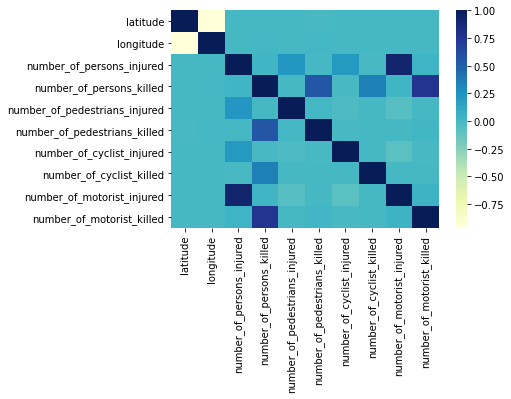

In [924]:
dataplot = sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=False)
dataplot.show()

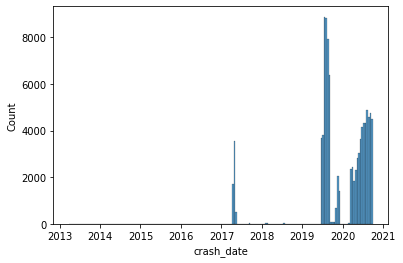

In [925]:
histoplot = sns.histplot(data=df_copy, x="crash_date")

In [926]:
df_copy.to_csv("final_csv_file.csv")